In [2]:
import win32com.client
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import csv
import nltk
import math

In [ ]:
'''#tokenizing 
nltk.download('punkt')
#POS Tagging
nltk.download('averaged_perceptron_tagger')
#universalTagging
nltk.download('universal_tagset')
#chunking
nltk.download('maxent_ne_chunker')
#words
nltk.download('words')'''

In [3]:
mail=pd.read_csv("Rajat_NLTK.csv")

In [4]:
mail.head(2)

,Unnamed: 0,Unnamed: 0.1,SrNo,Subject,Message,Recipients,Sender,Time,SubLen,MsgLen,MsgTokens,MsgSentenceTokens,POS_Msg,POS_Msg_Noun,Chunked,POS_Msg_Uni,Sentiments
0,0,0,0,RE: Rental laptops 5nos issued at TIS helpdesk.,i've collected the 2 laptops. the laptop assig...,"['Rajat.Chaudhari@mastek.com', 'assetMGMT@mast...",Sujeetkumar Sinha,2018-02-16 13:55:46+00:00,48,277,"['i', 'collected', 'the', 'laptops', 'the', 'l...","[""i've collected the 2 laptops."", 'the laptop ...","[('i', 'NN'), ('collected', 'VBD'), ('the', 'D...","['i', 'laptops', 'laptop', 'i', 'back', 'scree...","[('i', 'NN'), ('collected', 'VBD'), ('the', 'D...","[('i', 'NOUN'), ('collected', 'VERB'), ('the',...",1.0
1,1,1,1,RE: Can Delhi be cancelled?,looping joel. \r\r\r\r\n\r\r\r\r\n \r\r\r\r\n\...,"['Pooja.Nagar@mastek.com', 'Rajat.Chaudhari@ma...",Faheem A Siddiqui,2018-02-16 12:58:23+00:00,27,52,"['looping', 'joel', 'thanks', 'and']","['looping joel.', 'thanks and']","[('looping', 'VBG'), ('joel', 'NN'), ('thanks'...","['joel', 'thanks']","[('looping', 'VBG'), ('joel', 'NN'), ('thanks'...","[('looping', 'VERB'), ('joel', 'NOUN'), ('than...",1.0


In [4]:
#exported so no need as of now
'''negative=[]
nwords=pd.read_csv("words-negative.csv")
for word in nwords.iterrows():
    negative.append(word)'''

In [5]:
#exported so no need as of now
'''positive=[]
pwords=pd.read_csv("words-positive.csv")
for word in pwords.iterrows():
    positive.append(word''')

In [6]:
#exported so no need as of now
'''def sentiment(text):
    temp=[]
    ncount=0
    pcount=0
    for word in text:
        for item in positive:
            if(word==item[0]):
                pcount +=1
        for item in negative:
            if(word==item[0]):
                ncount +=1
    if(pcount>0 and ncount==0):
        temp.append(1)
    elif(ncount%2>0):
        temp.append(-1)
    elif(ncount%2==0 and ncount==0):
        temp.append(1)
    else:
        temp.append(0)
    return temp  '''  

In [7]:
#exported so no need as of now
'''mail["Sentiments"]=mail["MsgTokens"].apply(lambda x: np.average(sentiment(x))) '''

In [10]:
mail.head(2)

,Unnamed: 0,SrNo,Subject,Message,Recipients,Sender,Time,SubLen,MsgLen,MsgTokens,MsgSentenceTokens,POS_Msg,POS_Msg_Noun,Chunked,POS_Msg_Uni,Sentiments
0,0,0,RE: Rental laptops 5nos issued at TIS helpdesk.,i've collected the 2 laptops. the laptop assig...,"['Rajat.Chaudhari@mastek.com', 'assetMGMT@mast...",Sujeetkumar Sinha,2018-02-16 13:55:46+00:00,48,277,"['i', 'collected', 'the', 'laptops', 'the', 'l...","[""i've collected the 2 laptops."", 'the laptop ...","[('i', 'NN'), ('collected', 'VBD'), ('the', 'D...","['i', 'laptops', 'laptop', 'i', 'back', 'scree...","[('i', 'NN'), ('collected', 'VBD'), ('the', 'D...","[('i', 'NOUN'), ('collected', 'VERB'), ('the',...",1.0
1,1,1,RE: Can Delhi be cancelled?,looping joel. \r\r\r\n\r\r\r\n \r\r\r\n\r\r\r\...,"['Pooja.Nagar@mastek.com', 'Rajat.Chaudhari@ma...",Faheem A Siddiqui,2018-02-16 12:58:23+00:00,27,52,"['looping', 'joel', 'thanks', 'and']","['looping joel.', 'thanks and']","[('looping', 'VBG'), ('joel', 'NN'), ('thanks'...","['joel', 'thanks']","[('looping', 'VBG'), ('joel', 'NN'), ('thanks'...","[('looping', 'VERB'), ('joel', 'NOUN'), ('than...",1.0


In [8]:
#mail.to_csv('Rajat_NLTK.csv',sep=',',encoding='utf-8')

In [5]:
dataset={}
for index,item in mail.iterrows():
    #print(str(index)+" "+item["Subject"])
    key=item["SrNo"]
    value=str(item["Subject"]).lower() + " #*# " + str(item["Message"]).lower().replace('\r',"")
    dataset[key]=value

In [6]:
def tf(data,filename):
    text=data[filename]
    tokens=nltk.word_tokenize(text)
    fd=nltk.FreqDist(tokens)
    return fd

In [7]:
def idf(data,term):
    count=[term in data[mail_no] for mail_no in data]
    inv_feq=math.log(len(count)/sum(count))
    return inv_feq

In [8]:
def tfidf(data,srno,n):
    term_scores={}
    file_fd=tf(data,srno)
    for term in file_fd:
        if term.isalpha():
            idf_val=idf(data,term)
            tf_val=tf(data,srno)[term]
            tfidf_val=tf_val*idf_val
            term_scores[term]=round(tfidf_val,2)
    return sorted(term_scores.items(),key=lambda x:-x[1])[:n]

In [20]:
myli=[]
for item in dataset:
    #print(str(index)+" "+item["Subject"])
    myli.append(tfidf(dataset,item,10))

In [22]:
df=pd.DataFrame({'TFIDF':myli})

In [23]:
df.head()

,TFIDF
0,"[(laptops, 9.91), (scratched, 7.73), (rental, ..."
1,"[(looping, 6.12), (joel, 5.24), (cancelled, 5...."
2,"[(faheem, 6.63), (looping, 6.12), (girish, 5.7..."
3,"[(laptops, 14.86), (vijay, 11.21), (eom, 9.56)..."
4,"[(laptops, 9.91), (noc, 7.03), (rental, 6.34),..."


In [24]:
frames = [mail,df]

In [25]:
mail2=pd.concat(frames)

In [30]:
mail2=mail

In [ ]:
mail

# rough work

In [13]:
nltk.download('book_grammars')

[nltk_data] Downloading package book_grammars to
[nltk_data]     C:\Users\rajat13440\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping grammars\book_grammars.zip.


True

In [14]:
nltk.data.show_cfg('grammars/book_grammars/sql0.fcfg')

% start S
S[SEM=(?np + WHERE + ?vp)] -> NP[SEM=?np] VP[SEM=?vp]
VP[SEM=(?v + ?pp)] -> IV[SEM=?v] PP[SEM=?pp]
VP[SEM=(?v + ?ap)] -> IV[SEM=?v] AP[SEM=?ap]
NP[SEM=(?det + ?n)] -> Det[SEM=?det] N[SEM=?n]
PP[SEM=(?p + ?np)] -> P[SEM=?p] NP[SEM=?np]
AP[SEM=?pp] -> A[SEM=?a] PP[SEM=?pp]
NP[SEM='Country="greece"'] -> 'Greece'
NP[SEM='Country="china"'] -> 'China'
Det[SEM='SELECT'] -> 'Which' | 'What'
N[SEM='City FROM city_table'] -> 'cities'
IV[SEM=''] -> 'are'
A[SEM=''] -> 'located'
P[SEM=''] -> 'in'


In [16]:
from nltk import load_parser
cp = load_parser('grammars/book_grammars/sql0.fcfg')
query = 'What cities are located in China'
trees = list(cp.parse(query.split()))
answer = trees[0].label()['SEM']
answer = [s for s in answer if s]
q = ' '.join(answer)
print(q)


SELECT City FROM city_table WHERE Country="china"


In [28]:
trees

[Tree(S[SEM=(SELECT, City FROM city_table, WHERE, , , Country="china")], [Tree(NP[SEM=(SELECT, City FROM city_table)], [Tree(Det[SEM='SELECT'], ['What']), Tree(N[SEM='City FROM city_table'], ['cities'])]), Tree(VP[SEM=(, , Country="china")], [Tree(IV[SEM=''], ['are']), Tree(AP[SEM=(, Country="china")], [Tree(A[SEM=''], ['located']), Tree(PP[SEM=(, Country="china")], [Tree(P[SEM=''], ['in']), Tree(NP[SEM='Country="china"'], ['China'])])])])])]

(SELECT, City FROM city_table, WHERE, , , Country="china")

In [155]:
mail[["Subject","Message"]]

"i've collected the 2 laptops. the laptop assigned to me is working fine, however i noticed that the back of the screen is all scratched and has a dent in one spot. below is the pic of the same. just wanted to highlight this to avoid any issues later.\r\r\r\n\r\r\r\n\r\r\r\n\r\r\r\n\r\r\r\n\r\r\r\n\r\r\r\n\r\r\r\n\r\r\r\n"

In [18]:
nltk.download('city_database')

[nltk_data] Downloading package city_database to
[nltk_data]     C:\Users\rajat13440\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\city_database.zip.


True

In [20]:
from nltk.sem import chat80
rows = chat80.sql_query('corpora/city_database/city.db', q)


In [22]:
for r in rows: print(r[0], end=" ")

chungking dairen harbin kowloon mukden peking shanghai sian tientsin 

In [56]:
test=mail["MsgTokens"][100]

In [ ]:
nltk.chunk.ne_chunk(test.split())

In [39]:
mail["POS_Msg"][0]

"[('i', 'NN'), ('collected', 'VBD'), ('the', 'DT'), ('laptops', 'NNS'), ('the', 'DT'), ('laptop', 'NN'), ('assigned', 'VBD'), ('to', 'TO'), ('me', 'PRP'), ('is', 'VBZ'), ('working', 'VBG'), ('fine', 'JJ'), ('however', 'RB'), ('i', 'NN'), ('noticed', 'VBD'), ('that', 'IN'), ('the', 'DT'), ('back', 'NN'), ('of', 'IN'), ('the', 'DT'), ('screen', 'NN'), ('is', 'VBZ'), ('all', 'DT'), ('scratched', 'VBN'), ('and', 'CC'), ('has', 'VBZ'), ('a', 'DT'), ('dent', 'NN'), ('in', 'IN'), ('one', 'CD'), ('spot', 'NN'), ('below', 'NN'), ('is', 'VBZ'), ('the', 'DT'), ('pic', 'NN'), ('of', 'IN'), ('the', 'DT'), ('same', 'JJ'), ('just', 'RB'), ('wanted', 'VBD'), ('to', 'TO'), ('highlight', 'VB'), ('this', 'DT'), ('to', 'TO'), ('avoid', 'VB'), ('any', 'DT'), ('issues', 'NNS'), ('later', 'RBR')]"

In [38]:
df=pd.DataFrame()
for item in mail:
    df.append(tfidf(mail,str(item["Message"]),5)) 

TypeError: string indices must be integers

In [24]:
li

[FreqDist({'#': 2,
           "'ve": 1,
           '*': 1,
           ',': 1,
           '.': 5,
           '2': 1,
           '5nos': 1,
           ':': 1,
           'a': 1,
           'all': 1,
           'and': 1,
           'any': 1,
           'assigned': 1,
           'at': 1,
           'avoid': 1,
           'back': 1,
           'below': 1,
           'collected': 1,
           'dent': 1,
           'fine': 1,
           'has': 1,
           'helpdesk': 1,
           'highlight': 1,
           'however': 1,
           'i': 2,
           'in': 1,
           'is': 3,
           'issued': 1,
           'issues': 1,
           'just': 1,
           'laptop': 1,
           'laptops': 2,
           'later': 1,
           'me': 1,
           'noticed': 1,
           'of': 2,
           'one': 1,
           'pic': 1,
           're': 1,
           'rental': 1,
           'same': 1,
           'scratched': 1,
           'screen': 1,
           'spot': 1,
           'that': 1,
        

In [39]:
vect = TfidfVectorizer(stop_words='english', max_df=0.50, min_df=2)

NameError: name 'TfidfVectorizer' is not defined

In [35]:
mail2=mail.join(df)

In [36]:
mail2.head(2)

,SrNo,Subject,Message,Recipients,Sender,Time,SubLen,MsgLen,MsgTokens,MsgSentenceTokens,POS_Msg,POS_Msg_Noun,Chunked,POS_Msg_Uni,Sentiments,TFIDF
0,0,RE: Rental laptops 5nos issued at TIS helpdesk.,i've collected the 2 laptops. the laptop assig...,"['Rajat.Chaudhari@mastek.com', 'assetMGMT@mast...",Sujeetkumar Sinha,2018-02-16 13:55:46+00:00,48,277,"['i', 'collected', 'the', 'laptops', 'the', 'l...","[""i've collected the 2 laptops."", 'the laptop ...","[('i', 'NN'), ('collected', 'VBD'), ('the', 'D...","['i', 'laptops', 'laptop', 'i', 'back', 'scree...","[('i', 'NN'), ('collected', 'VBD'), ('the', 'D...","[('i', 'NOUN'), ('collected', 'VERB'), ('the',...",1.0,"[(laptops, 9.91), (scratched, 7.73), (rental, ..."
1,1,RE: Can Delhi be cancelled?,looping joel. \r\r\r\r\n\r\r\r\r\n \r\r\r\r\n\...,"['Pooja.Nagar@mastek.com', 'Rajat.Chaudhari@ma...",Faheem A Siddiqui,2018-02-16 12:58:23+00:00,27,52,"['looping', 'joel', 'thanks', 'and']","['looping joel.', 'thanks and']","[('looping', 'VBG'), ('joel', 'NN'), ('thanks'...","['joel', 'thanks']","[('looping', 'VBG'), ('joel', 'NN'), ('thanks'...","[('looping', 'VERB'), ('joel', 'NOUN'), ('than...",1.0,"[(looping, 6.12), (joel, 5.24), (cancelled, 5...."


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
vect = TfidfVectorizer(stop_words='english', max_df=0.50, min_df=2)

In [48]:
X = vect.fit_transform(mail["MsgTokens"])

In [61]:
type(X)

scipy.sparse.csr.csr_matrix

In [63]:
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=2,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [73]:
X.shape

(2268, 5785)

In [59]:
from sklearn import linear_model
from sklearn.decomposition import PCA

In [113]:
indices = np.argsort(vect.idf_)[::-1]
features = vect.get_feature_names()

top_n = 5
top_features = [features[i] for i in indices[:top_n]]
print (top_features)

['àmasteknet', 'screening', 'low', 'lounge', 'scheduler']


In [114]:
indices

array([5784, 4569, 3029, ..., 4119, 5186, 2301], dtype=int64)

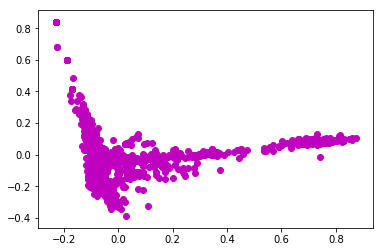

In [60]:
X_dense = X.todense()
coords = PCA(n_components=2).fit_transform(X_dense)
plt.scatter(coords[:, 0], coords[:, 1], c='m')
plt.show()

In [64]:
from sklearn.cluster import KMeans

In [141]:
pca=PCA(n_components=2).fit_transform(X_dense)
n_clusters = 5
clf = KMeans(n_clusters=n_clusters, max_iter=100, init='k-means++', n_init=1)
labels = clf.fit_predict(X)

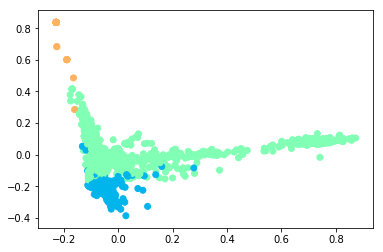

In [149]:
plt.scatter(pca[:,0],pca[:,1],c=labels,cmap='rainbow')
plt.show()

In [91]:
features = vect.get_feature_names()

In [111]:
stopwords=vect.get_stop_words()

In [119]:
len(labels)

2268

In [128]:
dflabels=pd.DataFrame({'Labels':labels})

In [163]:
mail=mail.join(dflabels)

In [130]:
y=np.unique(labels)

In [171]:
mail.head(2)

,SrNo,Subject,Message,Recipients,Sender,Time,SubLen,MsgLen,MsgTokens,MsgSentenceTokens,POS_Msg,POS_Msg_Noun,Chunked,POS_Msg_Uni,Sentiments,Labels
0,0,RE: Rental laptops 5nos issued at TIS helpdesk.,i've collected the 2 laptops. the laptop assig...,"['Rajat.Chaudhari@mastek.com', 'assetMGMT@mast...",Sujeetkumar Sinha,2018-02-16 13:55:46+00:00,48,277,"['i', 'collected', 'the', 'laptops', 'the', 'l...","[""i've collected the 2 laptops."", 'the laptop ...","[('i', 'NN'), ('collected', 'VBD'), ('the', 'D...","['i', 'laptops', 'laptop', 'i', 'back', 'scree...","[('i', 'NN'), ('collected', 'VBD'), ('the', 'D...","[('i', 'NOUN'), ('collected', 'VERB'), ('the',...",1.0,0
1,1,RE: Can Delhi be cancelled?,looping joel. \r\r\r\r\n\r\r\r\r\n \r\r\r\r\n\...,"['Pooja.Nagar@mastek.com', 'Rajat.Chaudhari@ma...",Faheem A Siddiqui,2018-02-16 12:58:23+00:00,27,52,"['looping', 'joel', 'thanks', 'and']","['looping joel.', 'thanks and']","[('looping', 'VBG'), ('joel', 'NN'), ('thanks'...","['joel', 'thanks']","[('looping', 'VBG'), ('joel', 'NN'), ('thanks'...","[('looping', 'VERB'), ('joel', 'NOUN'), ('than...",1.0,3


In [176]:
label0=mail.loc[lambda x:x.Labels==0,:]
label1=mail.loc[lambda x:x.Labels==1,:]
label2=mail.loc[lambda x:x.Labels==2,:]
label3=mail.loc[lambda x:x.Labels==3,:]
label4=mail.loc[lambda x:x.Labels==4,:]

In [177]:
mail.to_csv('Rajat_NLTK_label0.csv',sep=',',encoding='utf-8')
mail.to_csv('Rajat_NLTK_label1.csv',sep=',',encoding='utf-8')
mail.to_csv('Rajat_NLTK_label2.csv',sep=',',encoding='utf-8')
mail.to_csv('Rajat_NLTK_label3.csv',sep=',',encoding='utf-8')
mail.to_csv('Rajat_NLTK_label4.csv',sep=',',encoding='utf-8')

In [178]:
label0

,SrNo,Subject,Message,Recipients,Sender,Time,SubLen,MsgLen,MsgTokens,MsgSentenceTokens,POS_Msg,POS_Msg_Noun,Chunked,POS_Msg_Uni,Sentiments,Labels
0,0,RE: Rental laptops 5nos issued at TIS helpdesk.,i've collected the 2 laptops. the laptop assig...,"['Rajat.Chaudhari@mastek.com', 'assetMGMT@mast...",Sujeetkumar Sinha,2018-02-16 13:55:46+00:00,48,277,"['i', 'collected', 'the', 'laptops', 'the', 'l...","[""i've collected the 2 laptops."", 'the laptop ...","[('i', 'NN'), ('collected', 'VBD'), ('the', 'D...","['i', 'laptops', 'laptop', 'i', 'back', 'scree...","[('i', 'NN'), ('collected', 'VBD'), ('the', 'D...","[('i', 'NOUN'), ('collected', 'VERB'), ('the',...",1.0,0
2,2,RE: Can Delhi be cancelled?,looping faheem and girish to assist you.\r\r\r...,"['Rajat.Chaudhari@mastek.com', 'Girish.Kulkarn...",Pooja V Nagar,2018-02-16 12:39:23+00:00,27,65,"['looping', 'faheem', 'and', 'girish', 'to', '...","['looping faheem and girish to assist you.', '...","[('looping', 'VBG'), ('faheem', 'NN'), ('and',...",['faheem'],"[('looping', 'VBG'), ('faheem', 'NN'), ('and',...","[('looping', 'VERB'), ('faheem', 'NOUN'), ('an...",1.0,0
5,5,Time to Change your Password,"dear rajat i. chaudhari,\r\r\r\r\n\r\r\r\r\nyo...",['Rajat.Chaudhari@mastek.com'],passwordexpiry@mastek.com,2018-02-16 08:01:37+00:00,28,930,"['dear', 'rajat', 'chaudhari', 'your', 'passwo...","['dear rajat i. chaudhari,\r\r\n\r\r\nyour pas...","[('dear', 'JJ'), ('rajat', 'NN'), ('chaudhari'...","['rajat', 'password', 'domain', 'password', 'a...","[('dear', 'JJ'), ('rajat', 'NN'), ('chaudhari'...","[('dear', 'ADJ'), ('rajat', 'NOUN'), ('chaudha...",1.0,0
6,6,Transport Deduction for the month of February ...,"dear rajat ishwar chaudhari, \r\r\r\r\n\r\r\r\...",['Rajat.Chaudhari@mastek.com'],Webmaster,2018-02-16 00:02:04+00:00,50,858,"['dear', 'rajat', 'ishwar', 'chaudhari', 'kind...","['dear rajat ishwar chaudhari, \r\r\n\r\r\nkin...","[('dear', 'JJ'), ('rajat', 'NN'), ('ishwar', '...","['rajat', 'ishwar', 'chaudhari', 'amount', 'na...","[('dear', 'JJ'), ('rajat', 'NN'), ('ishwar', '...","[('dear', 'ADJ'), ('rajat', 'NOUN'), ('ishwar'...",1.0,0
10,10,RE: Have you got your laptops? <EOM>,i just visited tis. the software installation ...,"['Vijay.Lugade@mastek.com', 'Rajat.Chaudhari@m...",Sujeetkumar Sinha,2018-02-15 15:19:09+00:00,36,132,"['i', 'just', 'visited', 'tis', 'the', 'softwa...","['i just visited tis.', 'the software installa...","[('i', 'NN'), ('just', 'RB'), ('visited', 'VBN...","['i', 'software', 'installation', 'tomorrow']","[('i', 'NN'), ('just', 'RB'), ('visited', 'VBN...","[('i', 'NOUN'), ('just', 'ADV'), ('visited', '...",1.0,0
11,11,Missed conversation with Vaibhao V. Khamgaonkar,vaibhao v. khamgaonkar 1:12 pm: \r\r\r\r\njeva...,"['', 'Rajat.Chaudhari@mastek.com']",Vaibhao V. Khamgaonkar,2018-02-15 13:15:20+00:00,47,50,"['vaibhao', 'khamgaonkar', 'pm', 'jevan', 'lun...",['vaibhao v. khamgaonkar 1:12 pm: \r\r\njevan?...,"[('vaibhao', 'NN'), ('khamgaonkar', 'NN'), ('p...","['vaibhao', 'khamgaonkar', 'pm', 'jevan', 'lun...","[('vaibhao', 'NN'), ('khamgaonkar', 'NN'), ('p...","[('vaibhao', 'NOUN'), ('khamgaonkar', 'NOUN'),...",1.0,0
12,12,Check-ins,mastek ir\r\r\r\r\n\r\r\r\r\n\r\r\r\r\n\r\r\r\...,['Rajat.Chaudhari@mastek.com'],ir@mastek.com,2018-02-15 13:00:28+00:00,9,209,"['mastek', 'ir', 'rajat', 'chaudhari', 'dear',...",['mastek ir\r\r\n\r\r\n\r\r\n\r\r\n\r\r\nrajat...,"[('mastek', 'NN'), ('ir', 'NN'), ('rajat', 'NN...","['mastek', 'ir', 'rajat', 'chaudhari', 'member...","[('mastek', 'NN'), ('ir', 'NN'), ('rajat', 'NN...","[('mastek', 'NOUN'), ('ir', 'NOUN'), ('rajat',...",1.0,0
13,13,Check-ins,mastek ir\r\r\r\r\n\r\r\r\r\n\r\r\r\r\n\r\r\r\...,['Rajat.Chaudhari@mastek.com'],ir@mastek.com,2018-02-15 12:42:18+00:00,9,234,"['mastek', 'ir', 'rajat', 'chaudhari', 'dear',...",['mastek ir\r\r\n\r\r\n\r\r\n\r\r\n\r\r\nrajat...,"[('mastek', 'NN'), ('ir', 'NN'), ('rajat', 'NN...","['mastek', 'ir', 'rajat', 'chaudhari', 'member...","[('mastek', 'NN'), ('ir', 'NN'), ('rajat', 'NN..."

In [179]:
label1

,SrNo,Subject,Message,Recipients,Sender,Time,SubLen,MsgLen,MsgTokens,MsgSentenceTokens,POS_Msg,POS_Msg_Noun,Chunked,POS_Msg_Uni,Sentiments,Labels
71,71,Cloud Community - Jan' 18 update We had fabulo...,yamini sawant mentioned you in the all company...,['Rajat.Chaudhari@mastek.com'],Rajat Chaudhari,2018-02-08 11:50:29+00:00,53,1858,"['yamini', 'sawant', 'mentioned', 'you', 'in',...","[""yamini sawant mentioned you in the all compa...","[('yamini', 'NN'), ('sawant', 'NN'), ('mention...","['yamini', 'sawant', 'company', 'group', 'yamm...","[('yamini', 'NN'), ('sawant', 'NN'), ('mention...","[('yamini', 'NOUN'), ('sawant', 'NOUN'), ('men...",1.0,1
103,103,"Rajat Chaudhari, start your day by seeing what...",<https://www.yammer.com/mastek.com/home?trk_e...,['Rajat.Chaudhari@mastek.com'],Joel J. Luis,2018-02-02 09:24:39+00:00,71,4578,"['https', 'discover', 'what', 'happening', 'ac...","["" <https://www.yammer.com/mastek.com/home?trk...","[('https', 'NN'), ('discover', 'VB'), ('what',...","['https', 'organization', 'https', 'd', 'deshm...","[('https', 'NN'), ('discover', 'VB'), ('what',...","[('https', 'NOUN'), ('discover', 'VERB'), ('wh...",1.0,1
117,117,Updates from All Company and other groups,<https://www.yammer.com/mastek.com/?trk_event...,"['Rajat.Chaudhari@mastek.com', 'Steffi.Lobo@ma...",Prashant P Sharma,2018-01-31 09:26:08+00:00,41,3025,"['https', 'updates', 'from', 'your', 'yammer',...",[' <https://www.yammer.com/mastek.com/?trk_eve...,"[('https', 'NN'), ('updates', 'NNS'), ('from',...","['https', 'updates', 'yammer', 'groups', 'grou...","[('https', 'NN'), ('updates', 'NNS'), ('from',...","[('https', 'NOUN'), ('updates', 'NOUN'), ('fro...",1.0,1
118,118,Updates from All Company,<https://www.yammer.com/mastek.com/?trk_event...,['Rajat.Chaudhari@mastek.com'],Hemant Zope,2018-01-31 09:05:28+00:00,24,2444,"['https', 'updates', 'from', 'your', 'yammer',...",[' <https://www.yammer.com/mastek.com/?trk_eve...,"[('https', 'NN'), ('updates', 'NNS'), ('from',...","['https', 'updates', 'yammer', 'groups', 'grou...","[('https', 'NN'), ('updates', 'NNS'), ('from',...","[('https', 'NOUN'), ('updates', 'NOUN'), ('fro...",1.0,1
152,152,Updates from IoTCommunity,<https://www.yammer.com/mastek.com/?trk_event...,"['Prashant.Sharma2@mastek.com', 'Rajat.Chaudha...",Amit Shirvaikar,2018-01-22 11:38:14+00:00,25,2816,"['https', 'updates', 'from', 'your', 'yammer',...",[' <https://www.yammer.com/mastek.com/?trk_eve...,"[('https', 'NN'), ('updates', 'NNS'), ('from',...","['https', 'updates', 'yammer', 'groups', 'grou...","[('https', 'NN'), ('updates', 'NNS'), ('from',...","[('https', 'NOUN'), ('updates', 'NOUN'), ('fro...",1.0,1
162,162,Updates from All Company,<https://www.yammer.com/mastek.com/?trk_event...,"['Sachin.Patel@mastek.com', 'Rajat.Chaudhari@m...",Milind Vengurlekar,2018-01-19 10:01:35+00:00,24,4811,"['https', 'updates', 'from', 'your', 'yammer',...",[' <https://www.yammer.com/mastek.com/?trk_eve...,"[('https', 'NN'), ('updates', 'NNS'), ('from',...","['https', 'updates', 'yammer', 'groups', 'grou...","[('https', 'NN'), ('updates', 'NNS'), ('from',...","[('https', 'NOUN'), ('updates', 'NOUN'), ('fro...",1.0,1
163,163,Updates from All Company,<https://www.yammer.com/mastek.com/?trk_event...,"['Milind.Vengurlekar@mastek.com', 'Rajat.Chaud...",Sachin H. Patel,2018-01-19 10:00:46+00:00,24,4231,"['https', 'updates', 'from', 'your', 'yammer',...",[' <https://www.yammer.com/mastek.com/?trk_eve...,"[('https', 'NN'), ('updates', 'NNS'), ('from',...","['https', 'updates', 'yammer', 'groups', 'grou...","[('https', 'NN'), ('updates', 'NNS'), ('from',...","[('https', 'NOUN'), ('updates', 'NOUN'), ('fro...",1.0,1
175,175,Mastek Toastmasters Club Meeting No#011 : New ...,\r\r\r\r\n\r\r\r\r\n \r\r\r\r\n\r\r\r\r\n <ht...,"['Sachin.Patel@mastek.com', '', 'Rajat.Chaudha...",sachin.patel@mastek.com,2018-01-15 14:45:43+00:00,98,320,['https'],[' \r\r\n\r\r\n \r\r\n\r\r\n <https://mastekgr...,"[('https', 'NN')]",['https'],"[('https', 'NN')]","[('https', 'NOUN'

In [166]:
label0

,MsgTokens,Labels
0,"['i', 'collected', 'the', 'laptops', 'the', 'l...",0
1,"['looping', 'joel', 'thanks', 'and']",3
2,"['looping', 'faheem', 'and', 'girish', 'to', '...",0
3,"['ask', 'them', 'to', 'create', 'local', 'user...",3
4,"['hi', 'team', 'please', 'collect', 'the', 'la...",3
5,"['dear', 'rajat', 'chaudhari', 'your', 'passwo...",0
6,"['dear', 'rajat', 'ishwar', 'chaudhari', 'kind...",0
7,"['your', 'project', 'assignment', 'as', 'of', ...",3
8,"['tis', 'will', 'issue', 'two', 'laptops', 'ea...",3
9,"['thanks', 'for', 'update', 'rajat', 'please',...",3


In [164]:
mail.head(2)

,SrNo,Subject,Message,Recipients,Sender,Time,SubLen,MsgLen,MsgTokens,MsgSentenceTokens,POS_Msg,POS_Msg_Noun,Chunked,POS_Msg_Uni,Sentiments,Labels
0,0,RE: Rental laptops 5nos issued at TIS helpdesk.,i've collected the 2 laptops. the laptop assig...,"['Rajat.Chaudhari@mastek.com', 'assetMGMT@mast...",Sujeetkumar Sinha,2018-02-16 13:55:46+00:00,48,277,"['i', 'collected', 'the', 'laptops', 'the', 'l...","[""i've collected the 2 laptops."", 'the laptop ...","[('i', 'NN'), ('collected', 'VBD'), ('the', 'D...","['i', 'laptops', 'laptop', 'i', 'back', 'scree...","[('i', 'NN'), ('collected', 'VBD'), ('the', 'D...","[('i', 'NOUN'), ('collected', 'VERB'), ('the',...",1.0,0
1,1,RE: Can Delhi be cancelled?,looping joel. \r\r\r\r\n\r\r\r\r\n \r\r\r\r\n\...,"['Pooja.Nagar@mastek.com', 'Rajat.Chaudhari@ma...",Faheem A Siddiqui,2018-02-16 12:58:23+00:00,27,52,"['looping', 'joel', 'thanks', 'and']","['looping joel.', 'thanks and']","[('looping', 'VBG'), ('joel', 'NN'), ('thanks'...","['joel', 'thanks']","[('looping', 'VBG'), ('joel', 'NN'), ('thanks'...","[('looping', 'VERB'), ('joel', 'NOUN'), ('than...",1.0,3


In [158]:
label0["MsgTokens"]

0       ['i', 'collected', 'the', 'laptops', 'the', 'l...
1                    ['looping', 'joel', 'thanks', 'and']
2       ['looping', 'faheem', 'and', 'girish', 'to', '...
3       ['ask', 'them', 'to', 'create', 'local', 'user...
4       ['hi', 'team', 'please', 'collect', 'the', 'la...
5       ['dear', 'rajat', 'chaudhari', 'your', 'passwo...
6       ['dear', 'rajat', 'ishwar', 'chaudhari', 'kind...
7       ['your', 'project', 'assignment', 'as', 'of', ...
8       ['tis', 'will', 'issue', 'two', 'laptops', 'ea...
9       ['thanks', 'for', 'update', 'rajat', 'please',...
10      ['i', 'just', 'visited', 'tis', 'the', 'softwa...
11      ['vaibhao', 'khamgaonkar', 'pm', 'jevan', 'lun...
12      ['mastek', 'ir', 'rajat', 'chaudhari', 'dear',...
13      ['mastek', 'ir', 'rajat', 'chaudhari', 'dear',...
14      ['ask', 'them', 'when', 'can', 'you', 'collect...
15      ['not', 'yet', 'tis', 'said', 'it', 's', 'in',...
16                                             ['thanks']
17      ['hi',

In [88]:
def top_feats_per_cluster(X, y, features, min_tfidf=0.1, top_n=25):
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label) 
        feats_df = top_mean_feats(X, features, ids,    min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [89]:
def plot_tfidf_classfeats_h(dfs):
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("cluster = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.score, align='center', color='#7530FF')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.features)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

In [90]:
plot_tfidf_classfeats_h(top_feats_per_cluster(X, labels, features, 0.1, 25))

NameError: name 'top_mean_feats' is not defined

# scikit

In [149]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [150]:
countVect=CountVectorizer()
tfidfVect=TfidfVectorizer()

In [156]:
train=mail[["Subject","Message"]]

In [157]:
count_vect.fit(train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [158]:
print(count_vect.vocabulary_)
# encode document


{'subject': 1, 'message': 0}


In [166]:
count_vect=count_vect.transform(train)

In [170]:
count_vect.shape

(2, 2)

In [172]:
print(type(count_vect))

<class 'scipy.sparse.csr.csr_matrix'>


In [173]:
print(count_vect.toarray())

[[0 1]
 [1 0]]


In [ ]:
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

In [178]:
mail.head(2)

,Unnamed: 0,SrNo,Subject,Message,Recipients,Sender,Time,SubLen,MsgLen,MsgTokens,MsgSentenceTokens,POS_Msg,POS_Msg_Noun,Chunked,POS_Msg_Uni,Sentiments
0,0,0,RE: Rental laptops 5nos issued at TIS helpdesk.,i've collected the 2 laptops. the laptop assig...,"['Rajat.Chaudhari@mastek.com', 'assetMGMT@mast...",Sujeetkumar Sinha,2018-02-16 13:55:46+00:00,48,277,"['i', 'collected', 'the', 'laptops', 'the', 'l...","[""i've collected the 2 laptops."", 'the laptop ...","[('i', 'NN'), ('collected', 'VBD'), ('the', 'D...","['i', 'laptops', 'laptop', 'i', 'back', 'scree...","[('i', 'NN'), ('collected', 'VBD'), ('the', 'D...","[('i', 'NOUN'), ('collected', 'VERB'), ('the',...",1.0
1,1,1,RE: Can Delhi be cancelled?,looping joel. \r\r\r\n\r\r\r\n \r\r\r\n\r\r\r\...,"['Pooja.Nagar@mastek.com', 'Rajat.Chaudhari@ma...",Faheem A Siddiqui,2018-02-16 12:58:23+00:00,27,52,"['looping', 'joel', 'thanks', 'and']","['looping joel.', 'thanks and']","[('looping', 'VBG'), ('joel', 'NN'), ('thanks'...","['joel', 'thanks']","[('looping', 'VBG'), ('joel', 'NN'), ('thanks'...","[('looping', 'VERB'), ('joel', 'NOUN'), ('than...",1.0


In [240]:
dataset={}
for index,item in mail.iterrows():
    #print(str(index)+" "+item["Subject"])
    key=item["SrNo"]
    value=str(item["Subject"]).lower() + " #*# " + item["Message"].lower().replace('\r',"")
    dataset[key]=value

In [219]:
def tf(data,filename):
    text=data[0]
    tokens=nltk.word_tokenize(text)
    fd=nltk.FreqDist(tokens)
    return fd

In [229]:
def idf(data,term):
    count=[term in data[mail_no] for mail_no in data]
    inv_feq=math.log(len(count)/sum(count))
    return inv_feq

In [222]:
import math

In [242]:
idf(dataset,"rajat")

1.285707124214722

In [248]:
def tfidf(data,srno,n):
    term_scores={}
    file_fd=tf(data,srno)
    for term in file_fd:
        if term.isalpha():
            idf_val=idf(data,term)
            tf_val=tf(data,srno)[term]
            tfidf_val=tf_val*idf_val
            term_scores[term]=round(tfidf_val,2)
    return sorted(term_scores.items(),key=lambda x:-x[1])[:n]    

In [251]:
tfidf(dataset,0,20)

[('laptops', 9.91),
 ('scratched', 7.73),
 ('rental', 6.34),
 ('noticed', 5.93),
 ('spot', 5.33),
 ('collected', 5.24),
 ('wanted', 4.84),
 ('issued', 4.73),
 ('laptop', 4.47),
 ('highlight', 4.39),
 ('later', 4.39),
 ('helpdesk', 4.26),
 ('avoid', 4.23),
 ('fine', 4.06),
 ('however', 3.63),
 ('assigned', 3.51),
 ('issues', 3.41),
 ('screen', 3.4),
 ('tis', 3.34),
 ('pic', 3.27)]